Future Stock Price Prediction

### Load Dataset from file

In [58]:

import pandas as pd
from pathlib import Path
PARQUET_PATH = Path("data/historical/all_stocks_historical.parquet")
df = pd.read_parquet(PARQUET_PATH)
df.to_csv("data/tick5_all_stocks_historical.csv", index=False)



In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings


df = pd.read_csv("data/tick5_all_stocks_historical.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25345 entries, 0 to 25344
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  25345 non-null  object 
 1   date    25345 non-null  object 
 2   open    13759 non-null  float64
 3   high    13759 non-null  float64
 4   low     13759 non-null  float64
 5   close   13759 non-null  float64
 6   volume  13759 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.4+ MB


In [39]:
df.head(10)

,ticker,date,open,high,low,close,volume
0,AACB,2005-09-27,NaN,NaN,NaN,NaN,NaN
1,AACB,2005-09-28,NaN,NaN,NaN,NaN,NaN
2,AACB,2005-09-29,NaN,NaN,NaN,NaN,NaN
3,AACB,2005-09-30,NaN,NaN,NaN,NaN,NaN
4,AACB,2005-10-03,NaN,NaN,NaN,NaN,NaN
5,AACB,2005-10-04,NaN,NaN,NaN,NaN,NaN
6,AACB,2005-10-05,NaN,NaN,NaN,NaN,NaN
7,AACB,2005-10-06,NaN,NaN,NaN,NaN,NaN
8,AACB,2005-10-07,NaN,NaN,NaN,NaN,NaN
9,AACB,2005-10-10,NaN,NaN,NaN,NaN,NaN


In [40]:
print(df.shape)
print(df.columns)
print(df.info())

(25345, 7)
Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25345 entries, 0 to 25344
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  25345 non-null  object 
 1   date    25345 non-null  object 
 2   open    13759 non-null  float64
 3   high    13759 non-null  float64
 4   low     13759 non-null  float64
 5   close   13759 non-null  float64
 6   volume  13759 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.4+ MB
None


In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
# for col in df.columns:
#     df[col] = pd.to_numeric(df[col], errors='ignore')

# df.describe()
# df[['Close','High','Low']].skew()
# df.select_dtypes(include='number').skew()

# Apply log transformation only
df['volume_log'] = np.log1p(df['volume'])  # log(1 + Volume)
df['close_log'] = np.log1p(df['close'])  # Add this line
df

,ticker,date,open,high,low,close,volume,volume_log,close_log
0,AACB,2005-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AACB,2005-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AACB,2005-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AACB,2005-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AACB,2005-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25340,AAL,2025-11-12,13.10,13.53,13.02,13.46,46029900.0,17.644802,2.671386
25341,AAL,2025-11-13,13.32,13.50,13.00,13.07,38615900.0,17.469175,2.644045
25342,AAL,2025-11-14,12.78,12.97,12.70,12.76,32782600.0,17.305408,2.621766
25343,AAL,2025-11-17,12.76,12.78,12.25,12.34,43055600.0,17.578003,2.590767


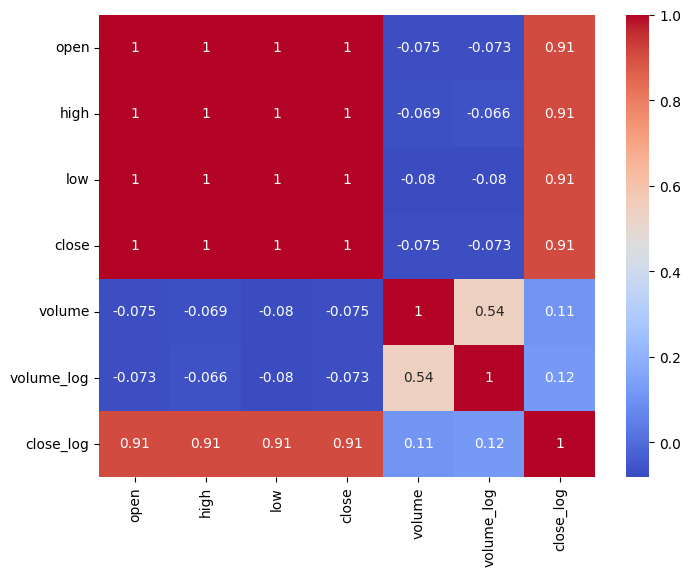

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()

In [44]:
df.select_dtypes(include='number').cov()

,open,high,low,close,volume,volume_log,close_log
open,4.227467e+02,4.252423e+02,4.198649e+02,4.225989e+02,-2.626550e+07,-6.643775e+00,2.598148e+01
high,4.252423e+02,4.278938e+02,4.223499e+02,4.252061e+02,-2.450230e+07,-6.020672e+00,2.617826e+01
low,4.198649e+02,4.223499e+02,4.171499e+02,4.198361e+02,-2.770045e+07,-7.288909e+00,2.577026e+01
close,4.225989e+02,4.252061e+02,4.198361e+02,4.226674e+02,-2.614115e+07,-6.682393e+00,2.597884e+01
volume,-2.626550e+07,-2.450230e+07,-2.770045e+07,-2.614115e+07,2.910290e+14,4.120525e+07,2.595284e+06
volume_log,-6.643775e+00,-6.020672e+00,-7.288909e+00,-6.682393e+00,4.120525e+07,1.971816e+01,7.514726e-01
close_log,2.598148e+01,2.617826e+01,2.577026e+01,2.597884e+01,2.595284e+06,7.514726e-01,1.940612e+00


In [45]:
#  Convert 'Date' column to proper datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort data by date (oldest → newest)
df = df.sort_values('date')

# Set 'Date' as the DataFrame index
df = df.set_index('date')
df

,ticker,open,high,low,close,volume,volume_log,close_log
date,,,,,,,,
2005-09-27,AACB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-27,AACBU,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-27,AADR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-27,AACG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-27,AAL,19.844701,20.174661,18.006357,18.194904,961200.0,13.775939,2.954645
...,...,...,...,...,...,...,...,...
2025-11-18,AACG,1.160000,1.300000,1.160000,1.260000,33500.0,10.419331,0.815365
2025-11-18,AACBU,10.800000,10.800000,10.800000,10.800000,0.0,0.000000,2.468100
2025-11-18,AACB,10.270000,10.270000,10.270000,10.270000,0.0,0.000000,2.422144


In [46]:
df.tail(10)

,ticker,open,high,low,close,volume,volume_log,close_log
date,,,,,,,,
2025-11-17,AAL,12.760000,12.780000,12.250000,12.340000,43055600.0,17.578003,2.590767
2025-11-17,AACBU,11.000000,11.000000,10.800000,10.800000,300.0,5.707110,2.468100
2025-11-17,AACB,10.270000,10.270000,10.270000,10.270000,32100.0,10.376642,2.422144
2025-11-17,AADR,83.089996,84.220001,83.089996,83.139999,1000.0,6.908755,4.432482
2025-11-17,AACG,1.220000,1.270000,1.220000,1.230000,10000.0,9.210440,0.802002
2025-11-18,AACG,1.160000,1.300000,1.160000,1.260000,33500.0,10.419331,0.815365
2025-11-18,AACBU,10.800000,10.800000,10.800000,10.800000,0.0,0.000000,2.468100
2025-11-18,AACB,10.270000,10.270000,10.270000,10.270000,0.0,0.000000,2.422144
2025-11-18,AADR,82.550003,82.970001,82.139999,82.970001,5300.0,8.575651,4.430460


In [47]:
df.dtypes
df.memory_usage(deep=True)

Index          202760
ticker        1343285
open           202760
high           202760
low            202760
close          202760
volume         202760
volume_log     202760
close_log      202760
dtype: int64

In [48]:
df = df.drop('volume', axis=1) # As we have log column column
df = df.drop('close', axis=1) # As we have log column column

In [49]:
df.columns.tolist()

['ticker', 'open', 'high', 'low', 'volume_log', 'close_log']

In [50]:
# Prepare prophet DataFrame
df = df.reset_index() # If not reset, you get error, because Date were index (in previouse step we did it)
prophet_df = df[['date', 'close_log']].rename(columns={'date': 'ds', 'close_log': 'y'})
prophet_df = prophet_df.sort_values('ds')

In [51]:
train = prophet_df.iloc[:-30]   # first 5094 rows (training)
test  = prophet_df.iloc[-30:]   # last 30 rows (testing)

In [52]:
from prophet import Prophet

model = Prophet()
model.fit(train)


01:01:51 - cmdstanpy - INFO - Chain [1] start processing
01:01:56 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
future = model.make_future_dataframe(periods=100, freq='D', include_history=False)
forecast = model.predict(future)
# print(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
90,2026-02-09,2.498099,0.737578,4.234164
91,2026-02-10,2.498771,0.826675,4.245723
92,2026-02-11,2.500983,0.852244,4.187863
93,2026-02-12,2.502626,0.816534,4.014952
94,2026-02-13,2.503511,0.979530,4.191386
95,2026-02-14,1.726284,0.062355,3.415196
96,2026-02-15,1.726750,-0.095248,3.338166
97,2026-02-16,2.503484,0.908725,4.184291
98,2026-02-17,2.503011,0.765442,4.148876
99,2026-02-18,2.503869,0.855834,4.176408


In [54]:
print("Last training date:", train['ds'].max())
print("First forecast date:", future['ds'].min())
print("Last forecast date:", future['ds'].max())

Last training date: 2025-11-10 00:00:00
First forecast date: 2025-11-11 00:00:00
Last forecast date: 2026-02-18 00:00:00


In [55]:
pred = forecast[['ds', 'yhat']].set_index('ds')
actual = test.set_index('ds')
comparison = actual.join(pred, how='inner')
print(comparison.tail())

                   y      yhat
ds                            
2025-11-18  2.422144  2.478501
2025-11-18  4.430460  2.478501
2025-11-18  0.815365  2.478501
2025-11-18  2.468100  2.478501
2025-11-18  2.592265  2.478501


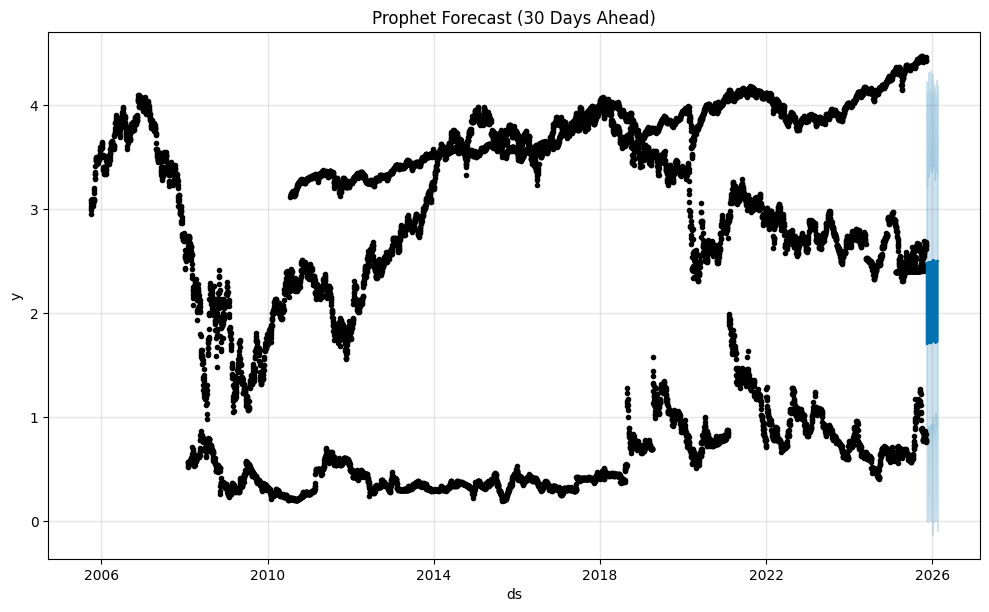

In [56]:
model.plot(forecast)
plt.title("Prophet Forecast (30 Days Ahead)")
plt.show()

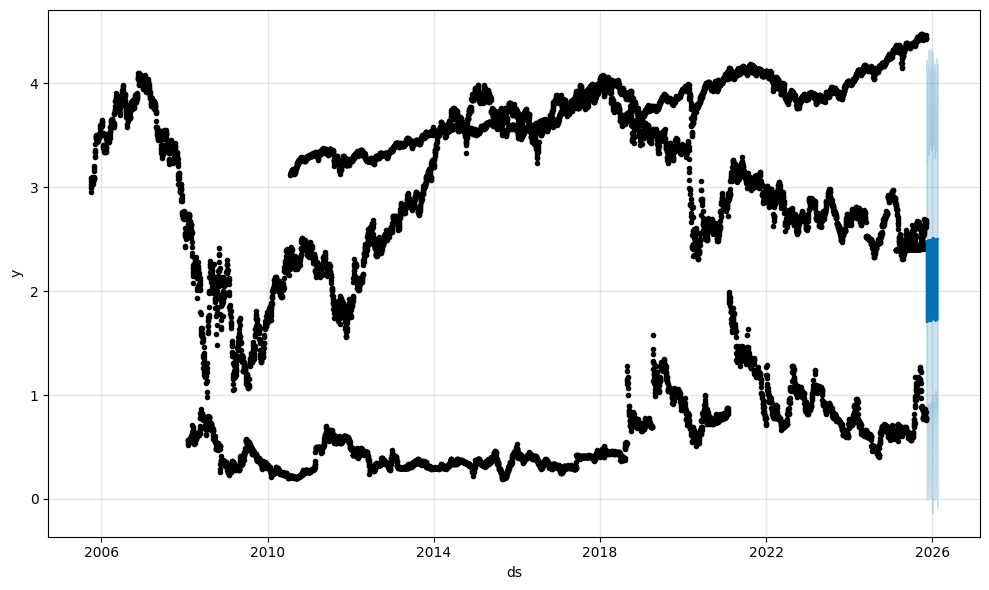

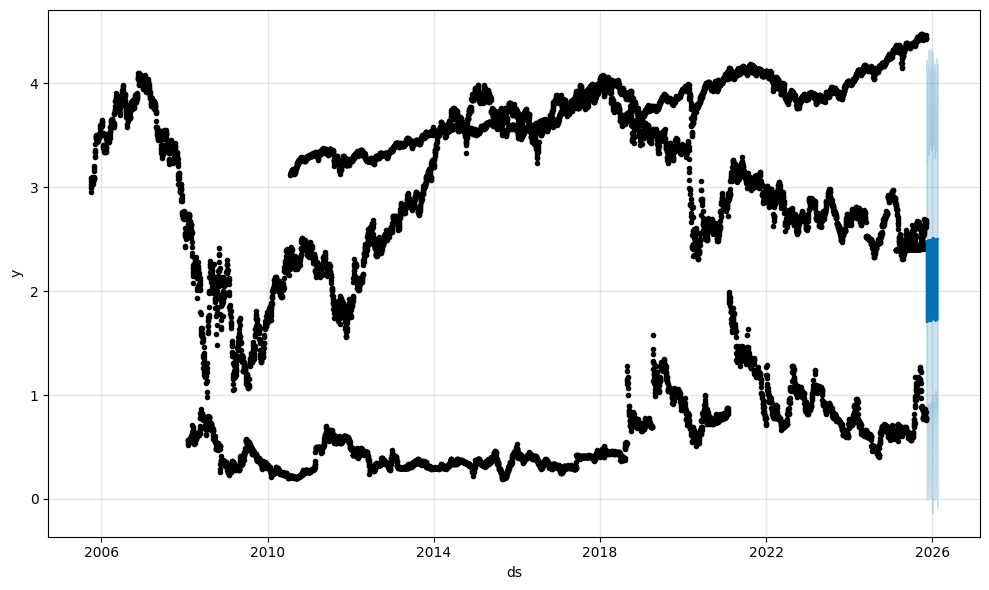

In [57]:
model.plot(forecast)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("yourfile.csv")

X = df[['feature1','feature2','feature3']]

# Step 1: Unsupervised K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Step 2: Use clusters as target label for supervised learning
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("KNN Accuracy:", knn.score(X_test, y_test))
